In [1]:
import json

import os
import glob

import re
import string

from collections import defaultdict

In [2]:
directories = glob.glob('data/republican_representatives/*')
directories[0]

'data/republican_representatives/@CongPalazzo'

In [3]:
def clean_tweet(tweet):
    tweet['full_text'] = re.sub(r"@\S+", "", tweet['full_text'])    # Remove mentions
    tweet['full_text'] = re.sub(r"#\S+", "", tweet['full_text'])    # Remove hasthags
    tweet['full_text'] = re.sub(r"http\S+", "", tweet['full_text']) # Remove links
    tweet['full_text'] = re.sub("\n", " ", tweet['full_text'])      # Remove newlines
    tweet['full_text'] = tweet['full_text'].encode('ascii', 'ignore').decode('ascii') # Remove emojis
    tweet['full_text'] = tweet['full_text'].translate(str.maketrans('', '', string.punctuation)) # Remove interpunction
    tweet['full_text'] = re.sub(' +', ' ', tweet['full_text'])      # Remove extra spaces
    tweet['full_text'] = tweet['full_text'].lower()                 # Set lowercase
    
    return tweet['full_text']

In [4]:
def generate_corpus(clean_tweets, corpus):
    for tweet in clean_tweets:
        for word in tweet.split(' '):
            corpus[word] += 1
            
    return corpus

In [5]:
corpus = defaultdict(int)

for directory in directories:
    paths = glob.glob(directory+'/*')
    
    clean_tweets = []
    for path in paths:
        with open(path) as f:
            tweet = json.load(f)
            cleaned = clean_tweet(tweet)
            clean_tweets.append(cleaned)
    
    corpus = generate_corpus(clean_tweets, corpus)

In [6]:
len(corpus)

50574

In [7]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['', 'rt', 'amp'])

In [8]:
most_used_words = sorted(corpus.items(), reverse=True, key=lambda x: x[1])[:100]

In [9]:
most_used_words = list(filter(lambda x: x[0] not in stop_words, most_used_words))

In [10]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
wc = WordCloud(background_color="white", max_words=40)

(-0.5, 399.5, 199.5, -0.5)

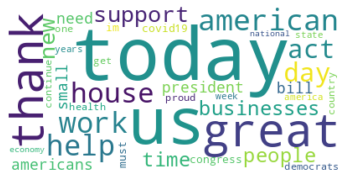

In [12]:
wc.generate_from_frequencies(dict(most_used_words))

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")